In [ ]:
# data = '/content/drive/MyDrive/yrs/final_asan1.csv'
# data = 'final_asan1.csv'
data = '/content/Asans - Sheet1 (1).csv'

In [ ]:
import re
from textblob import TextBlob
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords

In [ ]:
benefits = []
asan = []

In [ ]:
import csv

with open(data,'r') as file:
  reader = csv.reader(file)
  for row in reader:
    benefits.append(row[3])
    asan.append(row[1])

In [ ]:
benefits[1]
asan[1]

'Padanguli Naman'

In [ ]:
input_1=[]
output=[]
data = []

In [ ]:
for i in range (len(benefits)):
  line = benefits[i]
  line = line.lower()
  line = re.sub(r'[^A-Za-z\n]+', ' ', line)
  line = remove_stopwords(line)
  input_1.append(line)
  data.append(line)
  line = asan[i]
  line = re.sub(r'[^A-Za-z0-9 ]+', ' ', line)
  line = line.replace(" ","")
  line = line.replace("(","")
  line = line.replace(")","")
  line = line.replace(".","")
  line = line.replace("/","")
  output.append(line)

In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from keras.utils import np_utils
from tensorflow import keras
import keras.backend as K
import numpy as np

oov_token = "<OOV>"
embed_size = 20

In [ ]:
tokenizer = Tokenizer(oov_token=oov_token)
tokenizer.fit_on_texts(data)
word_index = tokenizer.word_index
sequence = tokenizer.texts_to_sequences(data)

print(len(word_index))

1424


In [ ]:
vocab_size = len(word_index)

In [ ]:
index_to_word_map = {}
word_to_index_map = {}
for word,index in word_index.items():
  index_to_word_map[index] = word
  word_to_index_map[word]=index

In [ ]:
tokenizer2 = Tokenizer(oov_token=oov_token)
tokenizer2.fit_on_texts(output)
word_index2 = tokenizer2.word_index
sequence2 = tokenizer2.texts_to_sequences(output)

print(len(word_index2))

228


In [ ]:
vocab_size2 = len(word_index2)

In [ ]:
index_to_word_map2 = {}
for word,index in word_index2.items():
  index_to_word_map2[index] = word

In [ ]:
benefits = []
asan = []

In [ ]:
for i in range (1,len(sequence)):
  benefits.append(sequence[i])
for i in range (1,len(sequence2)):
  asan.append(sequence2[i])

In [ ]:
asan = np.asarray(asan)
np.shape(asan)

(226, 1)

In [ ]:
y = asan - 3
y = tf.keras.utils.to_categorical(y,226)

In [ ]:
benefits = pad_sequences(benefits,50,padding='post',truncating='pre')

In [ ]:
benefits = np.array(benefits)
np.shape(benefits)

(226, 50)

In [ ]:
fields = ['Index','Word']
row = []
rows= []
for i in range(1,1425):
  row.append(i)
  row.append(index_to_word_map[i])
  rows.append(row)
  row=[]

In [ ]:
with open('/content/map.csv', 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(rows)

In [ ]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda, Flatten, Reshape
import tensorflow as tf

model = Sequential()
model.add(Embedding(vocab_size+1,embed_size,input_length=50))
model.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
model.add(Dense(vocab_size2-2, activation='softmax'))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 20)            28500     
_________________________________________________________________
lambda_1 (Lambda)            (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 226)               4746      
Total params: 33,246
Trainable params: 33,246
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(benefits,y,epochs=1000,batch_size=32)

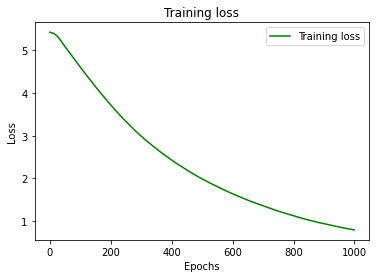

In [ ]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
accuracy = 0
for i in range(0,226):
  y = model.predict(benefits[i])
  z = np.sum(y,axis=0)
  z = z/50
  max=0
  for i in range(226):
    if z[i]>max:
      max = z[i]
      max_i = i
  if max_i+3==asan[i]:
    accuracy = accuracy+1

In [ ]:
accuracy

1

In [ ]:
a = model.evaluate(benefits, y, verbose=0)

In [ ]:
a

[0.7705013155937195, 0.8716813921928406]